<a href="https://colab.research.google.com/github/S-Muaz/AIML-IIITH/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [2]:
dataset =  datasets.fetch_california_housing()
print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
print(dataset.keys())  # if you want to know what else is there in this dataset
dataset.target = dataset.target.astype(int) # so that we can classify
print(dataset.data.shape)
print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [11]:
#using 25% of training data as validation data
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)


Validation accuracy of nearest neighbour is  0.34048257372654156


In [12]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using random classifier is  0.17607003891050585


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [13]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

<h4>1st Answer</h4>If we increase the % of validation data we can see that the accuracy is decreasing gradually . However, if we reduce the % of validation data then we can an increase in the accuracy
<h4>2nd Answer</h4>
The size of the training and validation sets can significantly impact how well we can predict the accuracy on the test set using the validation set. The relationship between these sets is essential for reliable model evaluation and generalization.One of the most important factor which  can have impact on the accuracy is the problem of overfitting & underfitting.<br>
Large Training Set: When you have a large training set and a small validation set, your model has more data to learn from, which can help it capture complex patterns in the data. However, if the model is too complex, it may overfit the training data and perform poorly on the validation and test sets.
Small Training Set: Conversely, if you have a small training set and a large validation set, your model may underfit the data, failing to capture important patterns. In this case, both training and validation accuracies may be low.<br>
The validation set should ideally be representative of the test set. If the validation set size is very different from the test set size, it may not provide an accurate estimate of how well the model will perform on unseen data. For example, if the validation set is much smaller than the test set, it may not capture the same distribution of data.<br>

<h4>3rd Answer</h4>
The percentage of data to reserve for the validation set can vary depending on the size of your overall dataset and the specific characteristics of your machine learning problem<br>
A common practice is to reserve 20% (or 30%) of your data for validation, leaving the remaining 80% (or 70%) for training. This is a reasonable starting point for many datasets and problems.<br>
In practice, there is no fixed rule, and you may need to experiment with different percentages to find the best balance between training and validation.<br>




Validation Accuracy for NN at  0.25  is  0.31098847589677
Validation Accuracy for Random Classifier at  0.25  is  0.17115727966239247
Validation Accuracy for NN at  0.5  is  0.3308895405669599
Validation Accuracy for Random Classifier at  0.5  is  0.16507820136852394
Validation Accuracy for NN at  0.15  is  0.302958833619211
Validation Accuracy for Random Classifier at  0.15  is  0.16730989136649513
Validation Accuracy for NN at  0.85  is  0.3655577299412916
Validation Accuracy for Random Classifier at  0.85  is  0.1710371819960861
Validation Accuracy for NN at  0.001  is  0.2651859942957704
Validation Accuracy for Random Classifier at  0.001  is  0.23077856666059834
Validation Accuracy for NN at  0.9990000000000001  is  0.4117647058823529
Validation Accuracy for Random Classifier at  0.9990000000000001  is  0.17647058823529413
Validation Accuracy for NN at  0.0001  is  0.22627781483053416
Validation Accuracy for Random Classifier at  0.0001  is  0.2889710786394228


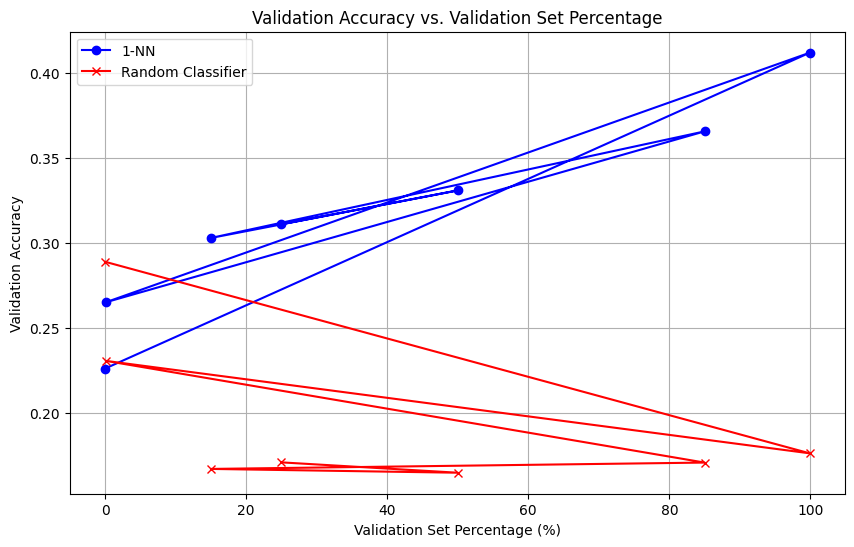

In [14]:
# Define a range of validation percentages to experiment with
validation_percentages = [25, 50, 15, 85, 0.1, 99.9, 0.01]

# Initialize arrays to store validation accuracy results for 1-NN and Random Classifier
validation_accuracy_1nn = []
validation_accuracy_random = []

# Iterate over the validation percentages
for percent in validation_percentages:
    # Calculate the actual validation percentage based on the total dataset size
    val_percent = percent / 100.0

    # Split the data into training and validation sets
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, val_percent)

    # Train and predict using 1-NN
    valpred_1nn = NN(traindata, trainlabel, valdata)

    # Calculate the validation accuracy for 1-NN
    valAccuracy_1nn = Accuracy(vallabel, valpred_1nn)
    validation_accuracy_1nn.append(valAccuracy_1nn)
    print("Validation Accuracy for NN at ",val_percent," is ",valAccuracy_1nn)

    # Train and predict using Random Classifier
    valpred_random = RandomClassifier(traindata, trainlabel, valdata)

    # Calculate the validation accuracy for Random Classifier
    valAccuracy_random = Accuracy(vallabel, valpred_random)
    validation_accuracy_random.append(valAccuracy_random)
    print("Validation Accuracy for Random Classifier at ",val_percent," is ",valAccuracy_random)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(validation_percentages, validation_accuracy_1nn, label='1-NN', marker='o', linestyle='-', color='b')
plt.plot(validation_percentages, validation_accuracy_random, label='Random Classifier', marker='x', linestyle='-', color='r')
plt.xlabel('Validation Set Percentage (%)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Validation Set Percentage')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [15]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [16]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata) #using testdata
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.339954026949515
test accuracy is  0.34917953667953666


In [17]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=RandomClassifier):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [18]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=RandomClassifier))
testpred = RandomClassifier(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.1694732915444604
test accuracy is  0.17277992277992277


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


<h4>1st Answer</h4>
Yes, averaging the validation accuracy across multiple splits typically gives more consistent results. By repeatedly splitting the data and evaluating the model, you reduce the impact of randomness in a single split. This helps provide a more stable and consistent estimate of your model's performance.<br>
<h4>2nd Answer</h4>
While averaging the validation accuracy provides a more consistent estimate of your model's performance on the validation set, it doesn't directly estimate the test accuracy. It gives you a more reliable estimate of how well your model generalizes to unseen data based on the validation set. However, the true test accuracy can only be obtained by evaluating the model on a separate test dataset.<br>
<h4>3rd Answer</h4>
The number of iterations does have an effect on the estimate of validation accuracy. Generally, as the number of iterations increases, the estimate becomes more stable and reliable. However, there may be diminishing returns. After a certain point, increasing the number of iterations may not significantly improve the estimate, and it may become computationally expensive.<br>
<h4>4th Answer</h4>
Increasing the number of iterations can help mitigate the impact of small train or validation datasets to some extent. With more iterations, you get multiple chances to evaluate the model on different subsets of the data, which can reduce the variability in the estimates. However, there are limits to how much iterations can compensate for extremely small datasets.
In cases of extremely small datasets, you should also consider techniques like cross-validation and bootstrapping, which provide additional ways to make the most of limited data. These techniques can provide more robust estimates of model performance, even with small datasets.